Ariane is taking a vacation in Deep Bay.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

### 407 particles were released at various depthts at time=0 in the following domain marked by the black rectangle.  

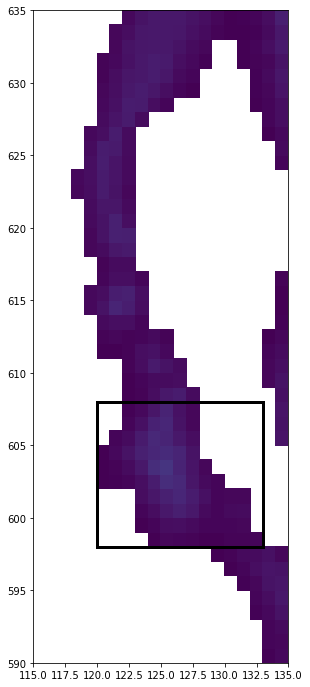

In [3]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(590,635)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((120,598), 13, 10, fill=False, linewidth=3))

In [4]:
result = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/weeklong/ariane_trajectories_qualitative.nc')

In [5]:
latt = result.variables['traj_lat']
lont = result.variables['traj_lon']

In [6]:
bathy, lons, lats = tidetools.get_bathy_data(grid)

In [7]:
number_of_particles = np.zeros(168)
for n in range(168):
    for m in range(407):
        if (lont[:].mask[n,m]) == False: 
            y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
            if (598<y<608) and (120<x<133):
                number_of_particles[n] = number_of_particles[n] + 1

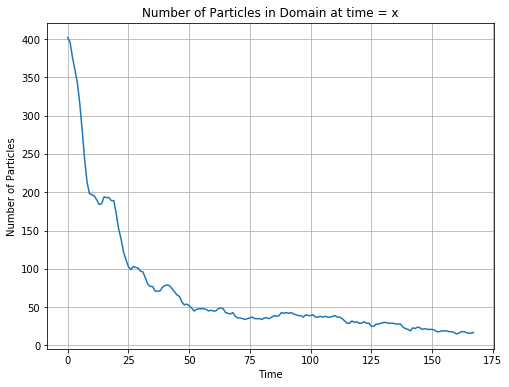

In [8]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(168)
ax.plot(time, number_of_particles)
ax.grid('on')
ax.set_title('Number of Particles in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')

In [9]:
index_deep_particles=[]
for n in range(407):
    if result.variables['init_z'][n] > 6:
        index_deep_particles.append(n)

In [10]:
number_of_deep_particles = np.zeros(168)
for n in range(168):
    for m in index_deep_particles:
        if (lont[:].mask[n,m]) == False: 
            y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
            if (598<y<608) and (120<x<133):
                number_of_deep_particles[n] = number_of_deep_particles[n] + 1

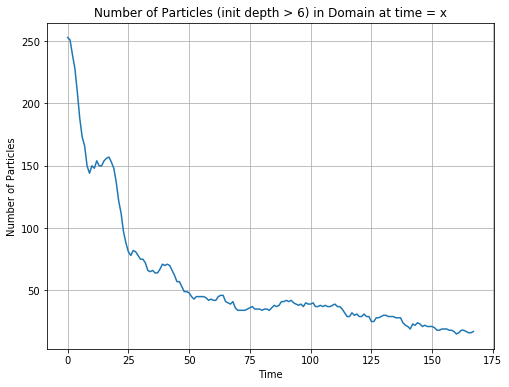

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(168)
ax.plot(time, number_of_deep_particles)
ax.grid('on')
ax.set_title('Number of Particles (init depth > 6) in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')

In [15]:
index_shallow_particles=[]
for n in range(407):
    if result.variables['init_z'][n] < 6:
        index_shallow_particles.append(n)

In [16]:
number_of_shallow_particles = np.zeros(168)
for n in range(168):
    for m in index_shallow_particles:
        if (lont[:].mask[n,m]) == False: 
            y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
            if (598<y<608) and (120<x<133):
                number_of_shallow_particles[n] = number_of_shallow_particles[n] + 1

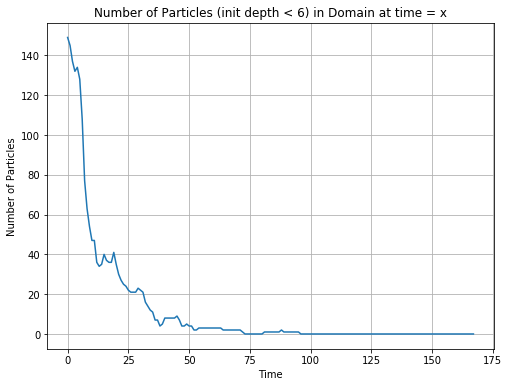

In [17]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(168)
ax.plot(time, number_of_shallow_particles)
ax.grid('on')
ax.set_title('Number of Particles (init depth < 6) in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')

In [21]:
lons

array([[-123.42943573, -123.42411804, -123.41880035, ..., -121.32898712,
        -121.32366943, -121.31835175],
       [-123.43196869, -123.42677307, -123.42152405, ..., -121.33235931,
        -121.32704163, -121.32172394],
       [-123.43463898, -123.42948151, -123.42427063, ..., -121.33573151,
        -121.33041382, -121.32509613],
       ..., 
       [-126.39330292, -126.38764191, -126.3819809 , ..., -124.34471893,
        -124.340065  , -124.3354187 ],
       [-126.39678955, -126.39109802, -126.38541412, ..., -124.34797668,
        -124.34333801, -124.3387146 ],
       [-126.40029144, -126.39456177, -126.38883209, ..., -124.35121918,
        -124.34658813, -124.34198761]])